In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
import pandas as pd

In [2]:
# importing sdf
molecules = Chem.SDMolSupplier('LC_General_Fragment_Library-Main_collection.sdf')

In [3]:
results = {
    "Lipinski Rule of 5": 0,
    "Ghose Filter": 0,
    "Veber Filter": 0,
    "REOS Filter": 0,
    "Passes All Filters": 0,
}

In [4]:
lipinsky_mol = []
ghose_mol = []
veber_mol = []
reos_mol = []

In [5]:
id_passed = []
chemical_name_passed = []
smiles_passed = []
price_coeff_passed = []
mw_passed = []
description_passed = []
fsp3_passed = []
clogp_passed = []
tpsa_passed = []
h_acceptor_passed = []
h_donor_passed = []
rot_bond_passed = []
number_of_atoms_passed = []
molar_refractivity_passed = []
formal_charge_passed = []
heavy_atoms_passed = []
num_of_rings_passed = []

In [6]:
def lipinsky(molecule):
    lipinsi_rule = False
    mw = Descriptors.ExactMolWt(molecule)
    clogp = Descriptors.MolLogP(molecule)
    h_acceptor = Descriptors.NumHAcceptors(molecule)
    h_donor = Descriptors.NumHDonors(molecule)
    rot_bond = Descriptors.NumRotatableBonds(molecule)
    
    if mw <= 500 and clogp <= 5 and h_donor <= 5 and h_acceptor <= 5 and rot_bond <= 5:
        lipinsi_rule = True
        
    return lipinsi_rule

In [7]:
def ghose(molecule):
    ghose_filter = False
    mw = Descriptors.ExactMolWt(molecule)
    clogp = Descriptors.MolLogP(molecule)
    number_of_atoms = Chem.rdchem.Mol.GetNumAtoms(molecule)
    molar_refractivity = Chem.Crippen.MolMR(molecule)
    
    if mw >= 160 and mw <= 480 and clogp >= 0.4 and clogp <= 5.6 and number_of_atoms >= 20 and number_of_atoms <= 70 and molar_refractivity >= 40 and molar_refractivity <= 130:
        ghose_filter = True
        
    return ghose_filter

In [8]:
def veber(molecule):
    veber_filter = False
    tpsa = Chem.QED.properties(molecule).PSA
    rot_bond = Descriptors.NumRotatableBonds(molecule)
    
    if rot_bond <= 10 and tpsa <= 140:
        veber_filter = True
        
    return veber_filter

In [9]:
def reos(molecule):
    reos_filter = False
    mw = Descriptors.ExactMolWt(molecule)
    clogp = Descriptors.MolLogP(molecule)
    h_acceptor = Descriptors.NumHAcceptors(molecule)
    h_donor = Descriptors.NumHDonors(molecule)
    formal_charge = Chem.rdmolops.GetFormalCharge(molecule)
    heavy_atoms = Chem.rdchem.Mol.GetNumHeavyAtoms(molecule)
    rot_bond = Descriptors.NumRotatableBonds(molecule)
    
    if mw >= 200 and mw <= 500 and clogp >= int(0 - 5) and clogp <= 5 and h_donor >= 0 and h_donor <= 5 and h_acceptor >= 0 and h_acceptor <= 10 and formal_charge >= int(0-2) and formal_charge <= 2 and rot_bond >= 0 and rot_bond <= 8 and heavy_atoms >= 15 and heavy_atoms <= 50:
        reos_filter = True
        
    return reos_filter

In [10]:
# alpha tubulin ligands
a_mols = ['CC(=O)N1CCN(CC1)C2=CC=C(C=C2)Cl',
        'CCNC1=C(C=C(C=C1)S(=O)(=O)C)F',
        'CC1=CC(=CC(=C1)S(=O)(=O)N)F',
        'CC(CO)(CO)NC(=O)NC1=CC=CC=C1',
        'CCC(=O)NC1=CC=C(C=C1)OC',
        'CNC(=O)C1=CC=C(C=C1)S(=O)(=O)N',
        'CC(=O)N1CC2=C(C1)C=C(C=C2)N',
        'CC1=CC=C(C=C1)CN2CCS(=O)(=O)CC2',
        'CNCC1=NC(=CC=C1)OC']

In [11]:
# beta tubulin ligands
b_mols = ['CC(C1=CC=C(C=C1)NC(=O)C2CC2)N',
        'CC(CO)(CO)NC(=O)NC1=CC=CC=C1',
        'CCNC1=C(C=C(C=C1)S(=O)(=O)C)F',
        'CNC1=CC=CC=C1S(=O)(=O)C',
        'CC(=O)NC1=CC=C(C=C1)C2=CSC(=N2)N',
        'CNC1=CC=CC=C1S(=O)(=O)C',
        'CC(C1=CC=C(C=C1)NC(=O)C2CC2)N',
        'CC1=C(SC=N1)C(=O)N2CCNC(=O)C2',
        'CC(C)N(C)C1=NC=NC2=C1C=NN2C',
        'CC1=NOC(=C1)C(=O)NC2=NN(C=C2)C',
        'CCC1=NOC(=C1C(=O)NC2=NOC(=C2)C)C',
        'C1CSCCN1CC2=CC(=CC=C2)O',
        'C1=CSC(=C1)CNCC2=CC=NC=C2',
        'CC(C)C(=O)N1CCN(CC1)C(C)C',
        'CC(C)N1CCN(CC1)C(=O)C2=CC=CS2',
        'CC(=O)N1CCC(CC1)NCCC2=CC=CC=C2',
        'C1=CC=C(C=C1)CNCC2=CC=C(C=C2)F',
        'CC(C)C1=NC=C(C(=N1)C(=O)N)Cl',
        'C1=CC=C(C=C1)NC(=O)NC2=CN=CC=C2',
        'CC1=CC(=CC=C1)C(=O)N2CCC(CC2)C(=O)N',
        'CC(=O)NC1=CC=C(C=C1)C2=CSC(=N2)N',
        'CC(=O)NC1=CC=CC=C1O',
        'CN1C=C(C(=N1)C(F)F)C(=O)N',
        'CC(=O)NC1=CC=C(C=C1)CC(=O)N',
        'CC1=C(C=NC=C1)NC(=O)C',
        'C1CC2(CC2)CN(C1)C(=O)COC(F)F',
        'C1CC1C2=NOC(=N2)CN3CCOCC3',
        'CC1=C(C=CN=C1)NC(=O)C',
        'C1CC(=O)N(C1)CCNC(=O)NC2=CC=CC=C2',
        'CC(=O)NC1CC2=CC=CC=C2NC1',
        'CNS(=O)(=O)C1=CC=CC=C1Cl',
        'CNC(=O)C1=CC=C(C=C1)S(=O)(=O)N',
        'CNC1=CC=CC=C1S(=O)(=O)C',
        'CC(=O)N1CCN(CC1)C2=CC=C(C=C2)Cl',
        'CCC1=NOC(=C1C(=O)NC2=NOC=C2)C',
        'COC1=CC=CC(=C1)C(=O)NC2=CC=CC=C2F',
        'C1=CC=C(C=C1)CNCC2=CC=C(C=C2)F',
        'COC1=CC=C(C=C1)NC(=O)CN',
        'CC1=CC(=CC=C1)C(=O)N2CCC(CC2)C(=O)N',
        'CN1C=C(C(=N1)C(F)F)C(=O)N',
        'CNS(=O)(=O)C1=CC=CC=C1Cl',
        'CC(C1=CC=C(C=C1)F)NC',
        'C1CN(CCN1C2=CC=C(C=C2)F)C(=O)N',
        'CCOC(=O)C1=CNN=C1']

In [12]:
a_tub_side_a = []
a_tub_side_b = []
a_tub_side_c = []
a_tub_side_d = []
a_tub_side_e = []

def tanimoto_similarity_a(mol):
    iteration_of_mol = 0
    
    side_a = []
    side_b = []
    side_c = []
    side_d = []
    side_e = []
    
    for a_mol in a_mols:
        ref_mol = Chem.MolFromSmiles(a_mol)
        ref_fp = Chem.RDKFingerprint(ref_mol)
        mol_fp = Chem.RDKFingerprint(mol)
        tan = DataStructs.TanimotoSimilarity(ref_fp, mol_fp)
       
        if iteration_of_mol == 0:
            side_a.append(tan)
        if iteration_of_mol > 0 and iteration_of_mol < 4:
            side_b.append(tan)
        if iteration_of_mol > 3 and iteration_of_mol < 7:
            side_c.append(tan)
        if iteration_of_mol == 7:
            side_d.append(tan)
        if iteration_of_mol > 7 and iteration_of_mol < 10:
            side_e.append(tan)
        
        iteration_of_mol += 1
    
    a_tub_side_a.append(max(side_a))
    a_tub_side_b.append(max(side_b))
    a_tub_side_c.append(max(side_c))
    a_tub_side_d.append(max(side_d))
    a_tub_side_e.append(max(side_e))
        
    tan_row = side_a + side_b + side_c + side_d + side_e    
    
    return tan_row

In [13]:
b_tub_side_a = []
b_tub_side_b = []
b_tub_side_c = []
b_tub_side_d = []
b_tub_side_e = []
b_tub_side_f = []
b_tub_side_g = []
b_tub_side_h = []

def tanimoto_similarity_b(mol):
    iteration_of_mol = 0
    
    side_a = []
    side_b = []
    side_c = []
    side_d = []
    side_e = []
    side_f = []
    side_g = []
    side_h = []
    
    for b_mol in b_mols:
        ref_mol = Chem.MolFromSmiles(b_mol)
        ref_fp = Chem.RDKFingerprint(ref_mol)
        mol_fp = Chem.RDKFingerprint(mol)
        tan = DataStructs.TanimotoSimilarity(ref_fp, mol_fp)
       
        if iteration_of_mol >= 0 and iteration_of_mol < 2:
            side_a.append(tan)
        if iteration_of_mol > 1 and iteration_of_mol < 4:
            side_b.append(tan)
        if iteration_of_mol == 4:
            side_c.append(tan)
        if iteration_of_mol > 4 and iteration_of_mol < 11:
            side_d.append(tan)
        if iteration_of_mol > 10 and iteration_of_mol < 17:
            side_e.append(tan)
        if iteration_of_mol > 16 and iteration_of_mol < 20:
            side_f.append(tan)
        if iteration_of_mol > 19 and iteration_of_mol < 32:
            side_g.append(tan)
        if iteration_of_mol > 31 and iteration_of_mol < 34:
            side_h.append(tan)
        
        iteration_of_mol += 1

    b_tub_side_a.append(max(side_a))
    b_tub_side_b.append(max(side_b))
    b_tub_side_c.append(max(side_c))
    b_tub_side_d.append(max(side_d))
    b_tub_side_e.append(max(side_e))
    b_tub_side_f.append(max(side_f))
    b_tub_side_g.append(max(side_g))
    b_tub_side_h.append(max(side_h))        
        
    tan_row = side_a + side_b + side_c + side_d + side_e + side_f + side_g + side_h 
    
    return tan_row

In [14]:
passed_mols = []

def mol_pass_test(mol):
    tan_a = tanimoto_similarity_a(mol)
    tan_b = tanimoto_similarity_b(mol)
    tan_a_above_85 = [tan for tan in tan_a if tan >= .85 and tan < 1]
    tan_b_above_85 = [tan for tan in tan_b if tan >= .85 and tan < 1]

    if tan_a_above_85 or tan_b_above_85:
        passed_mols.append(mol)

In [15]:
for molecule in molecules:
    mol_pass_test(molecule)

    if lipinsky(molecule):
        results["Lipinski Rule of 5"] += 1
        lipinsky_mol.append(True)
    else:
        lipinsky_mol.append(False)

    if ghose(molecule):
        results["Ghose Filter"] += 1
        ghose_mol.append(True)
    else:
        ghose_mol.append(False)

    if veber(molecule):
        results["Veber Filter"] += 1
        veber_mol.append(True)
    else:
        veber_mol.append(False)

    if reos(molecule):
        results["REOS Filter"] += 1
        reos_mol.append(True)
    else:
        reos_mol.append(False)
    
    if lipinsky(molecule) and ghose(molecule) and veber(molecule) and reos(molecule):
        results["Passes All Filters"] += 1
        
    
    # Get a single property
    id = molecule.GetProp('IDNUMBER')
    chemical_name = molecule.GetProp('Chemical_Name')
    smiles = Chem.MolToSmiles(molecule)
    price_coeff = molecule.GetProp('PriceCoeff')
    mw = Descriptors.ExactMolWt(molecule)
    description = molecule.GetProp('Description')
    fsp3 = molecule.GetProp('FSP3')
    clogp = Descriptors.MolLogP(molecule)
    tpsa = Chem.QED.properties(molecule).PSA
    h_acceptor = Descriptors.NumHAcceptors(molecule)
    h_donor = Descriptors.NumHDonors(molecule)
    rot_bond = Descriptors.NumRotatableBonds(molecule)
    number_of_atoms = Chem.rdchem.Mol.GetNumAtoms(molecule)
    molar_refractivity = Chem.Crippen.MolMR(molecule)
    formal_charge = Chem.rdmolops.GetFormalCharge(molecule)
    heavy_atoms = Chem.rdchem.Mol.GetNumHeavyAtoms(molecule)
    num_of_rings = Chem.rdMolDescriptors.CalcNumRings(molecule)

    id_passed.append(id)
    chemical_name_passed.append(chemical_name)
    smiles_passed.append(smiles)
    price_coeff_passed.append(price_coeff)
    mw_passed.append(mw)
    description_passed.append(description)
    fsp3_passed.append(fsp3)
    clogp_passed.append(clogp)
    tpsa_passed.append(tpsa)
    h_acceptor_passed.append(h_acceptor)
    h_donor_passed.append(h_donor)
    rot_bond_passed.append(rot_bond)
    number_of_atoms_passed.append(number_of_atoms)
    molar_refractivity_passed.append(molar_refractivity)
    formal_charge_passed.append(formal_charge)
    heavy_atoms_passed.append(heavy_atoms)
    num_of_rings_passed.append(num_of_rings)
   

In [16]:
for key, value in results.items():
    print(key, ': ', value)

Lipinski Rule of 5 :  40887
Ghose Filter :  18388
Veber Filter :  50524
REOS Filter :  42404
Passes All Filters :  13227


In [18]:
len(passed_mols)

15

In [19]:
sdfExportData = pd.DataFrame({'id': id_passed,
                             'chemical_name': chemical_name_passed,
                             'smiles': smiles_passed,
                             'price_coeff': price_coeff_passed,
                             'mw': mw_passed,
                             'fsp3': fsp3_passed,
                             'clogp': clogp_passed,
                             'tpsa': tpsa_passed,
                             'h_acceptor': h_acceptor_passed,
                             'h_donor': h_donor_passed,
                             'rot_bond': rot_bond_passed,
                             'number_of_atoms': number_of_atoms_passed,
                             'molar_refractivity': molar_refractivity_passed,
                             'heavy_atoms': heavy_atoms_passed,
                             'num_of_rings': num_of_rings_passed, 
                             'a_tub_side_a': a_tub_side_a,
                             'a_tub_side_b': a_tub_side_b,
                             'a_tub_side_c': a_tub_side_c,
                             'a_tub_side_d': a_tub_side_d,
                             'a_tub_side_e': a_tub_side_e,
                             'b_tub_side_a': b_tub_side_a,
                             'b_tub_side_b': b_tub_side_b,
                             'b_tub_side_c': b_tub_side_c,
                             'b_tub_side_d': b_tub_side_d,
                             'b_tub_side_e': b_tub_side_e,
                             'b_tub_side_f': b_tub_side_f,
                             'b_tub_side_g': b_tub_side_g,
                             'b_tub_side_h': b_tub_side_h,
                             'lipinsky': lipinsky_mol,
                             'ghose': ghose_mol,
                             'veber': veber_mol,
                             'reos': reos_mol})

sdfExportData

,id,chemical_name,smiles,price_coeff,mw,fsp3,clogp,tpsa,h_acceptor,h_donor,...,b_tub_side_c,b_tub_side_d,b_tub_side_e,b_tub_side_f,b_tub_side_g,b_tub_side_h,lipinsky,ghose,veber,reos
0,F1903-0751,"5-fluoro-2-(piperazin-1-yl)-6-(propan-2-yl)-3,...",CC(C)c1nc(N2CCNCC2)[nH]c(=O)c1F,1.00,240.138639,0.64,0.44200,61.02,4,2,...,0.186253,0.250491,0.148481,0.222222,0.186253,0.136700,True,False,True,True
1,F1903-9899,"6-tert-butyl-2-(piperidin-4-yl)-2,3-dihydropyr...",CC(C)(C)c1ccc(=O)n(C2CCNCC2)n1,1.00,235.168462,0.69,1.46530,46.92,4,1,...,0.132479,0.223837,0.158520,0.162685,0.182713,0.114150,True,False,True,True
2,F1903-9900,"6-cyclopropyl-2-(piperidin-4-yl)-2,3-dihydropy...",O=c1ccc(C2CC2)nn1C1CCNCC1,1.50,219.137162,0.67,1.04520,46.92,4,1,...,0.134375,0.229305,0.157088,0.160907,0.184632,0.116114,True,False,True,True
3,F1904-0726,"1-{5H,6H,7H-cyclopenta[c]pyridazin-3-yl}piperi...",Cl.O=C(O)C1CCN(c2cc3c(nn2)CCC3)CC1,1.50,283.108754,0.62,1.68810,66.32,4,1,...,0.181269,0.256621,0.164767,0.206164,0.213347,0.156708,True,False,True,True
4,F1904-0909,"4-methyl-6-{octahydropyrrolo[3,4-c]pyrrol-2-yl...",Cc1cc(N2CC3CNCC3C2)ncn1.Cl.Cl,1.50,276.090852,0.64,1.28422,41.05,4,1,...,0.170918,0.298957,0.176000,0.206943,0.188679,0.164653,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50602,F6660-5389,"(2E)-3-(1-benzyl-1H-1,2,3-triazol-4-yl)-1-phen...",O=C(/C=C/c1cn(Cc2ccccc2)nn1)c1ccccc1,1.00,289.121512,0.06,3.22250,47.78,4,0,...,0.145688,0.194652,0.162791,0.187500,0.173055,0.115435,True,True,True,True
50603,F0788-0005,"3,9lambda5,13,19lambda5-tetraazapentacyclo[11....",[Br-].[Br-].c1cc[n+]2cc3n(c2c1)Cc1c[n+]2ccccc2...,1.00,419.958521,0.12,-4.81500,18.06,2,0,...,0.151174,0.232766,0.126316,0.169884,0.179018,0.119295,True,False,True,True
50604,F1604-0673,"3-(3-fluorophenyl)-4H,5H-[1,2,3]triazolo[1,5-a...",O=c1[nH]c2c(-c3cccc(F)c3)nnn2c2ccccc12,1.00,280.076039,0.00,2.37690,63.05,4,1,...,0.216777,0.285054,0.171216,0.188370,0.216777,0.140187,True,True,True,True
50605,F0916-4544,"2-(phenylamino)-5H-[1,3,4]thiadiazolo[2,3-b]qu...",O=c1c2ccccc2nc2sc(Nc3ccccc3)nn12,1.00,294.057532,0.00,3.04780,59.29,6,1,...,0.209622,0.285714,0.180712,0.184367,0.209622,0.163949,False,True,True,True


In [20]:
#######################################################################################
#add the chemical info to the data frame
#######################################################################################
# smilesCol: in which column the smiles are located
PandasTools.AddMoleculeColumnToFrame(sdfExportData, smilesCol='smiles', molCol='ROMol', includeFingerprints=False)
# to avoid duplicate smiles column
del sdfExportData['smiles']

In [21]:
########################################################################
###Export as an sdf file you can read into CIME
########################################################################

PandasTools.WriteSDF(sdfExportData,"./sdf/diploma_dataset_1.sdf",
                     properties=list(sdfExportData.columns), idName="id")


In [22]:
df = sdfExportData
df.to_csv (r'./csv/diploma_dataset_1.csv', index = None, header=True)

In [69]:
results = {
    "Lipinski Rule of 5": 0,
    "Ghose Filter": 0,
    "Veber Filter": 0,
    "REOS Filter": 0,
    "Passes All Filters": 0,
}

In [70]:
tubulin_site_ligands = {
    'a_tub_side_a': 0,
    'a_tub_side_b': 0,
    'a_tub_side_c': 0,
    'a_tub_side_d': 0,
    'a_tub_side_e': 0,
    'b_tub_side_a': 0,
    'b_tub_side_b': 0,
    'b_tub_side_c': 0,
    'b_tub_side_d': 0,
    'b_tub_side_e': 0,
    'b_tub_side_f': 0,
    'b_tub_side_g': 0,
    'b_tub_side_h': 0
}

In [71]:
lipinsky_mol = []
ghose_mol = []
veber_mol = []
reos_mol = []

In [72]:
id_passed = []
chemical_name_passed = []
smiles_passed = []
price_coeff_passed = []
mw_passed = []
description_passed = []
fsp3_passed = []
clogp_passed = []
tpsa_passed = []
h_acceptor_passed = []
h_donor_passed = []
rot_bond_passed = []
number_of_atoms_passed = []
molar_refractivity_passed = []
formal_charge_passed = []
heavy_atoms_passed = []
num_of_rings_passed = []

In [73]:
a_tub_side_a_passed_mols = []
a_tub_side_b_passed_mols = []
a_tub_side_c_passed_mols = []
a_tub_side_d_passed_mols = []
a_tub_side_e_passed_mols = []

b_tub_side_a_passed_mols = []
b_tub_side_b_passed_mols = []
b_tub_side_c_passed_mols = []
b_tub_side_d_passed_mols = []
b_tub_side_e_passed_mols = []
b_tub_side_f_passed_mols = []
b_tub_side_g_passed_mols = []
b_tub_side_h_passed_mols = []

In [74]:
def tanimoto_similarity_a(mol):
    iteration_of_mol = 0
    
    side_a = []
    side_b = []
    side_c = []
    side_d = []
    side_e = []
    
    for a_mol in a_mols:
        ref_mol = Chem.MolFromSmiles(a_mol)
        ref_fp = Chem.RDKFingerprint(ref_mol)
        mol_fp = Chem.RDKFingerprint(mol)
        tan = DataStructs.TanimotoSimilarity(ref_fp, mol_fp)
       
        if iteration_of_mol == 0:
            side_a.append(tan)
        if iteration_of_mol > 0 and iteration_of_mol < 4:
            side_b.append(tan)
        if iteration_of_mol > 3 and iteration_of_mol < 7:
            side_c.append(tan)
        if iteration_of_mol == 7:
            side_d.append(tan)
        if iteration_of_mol > 7 and iteration_of_mol < 10:
            side_e.append(tan)
        iteration_of_mol += 1
    
    if max(side_a) > .85:
        tubulin_site_ligands["a_tub_side_a"] += 1
    if max(side_b) > .85:
        tubulin_site_ligands["a_tub_side_b"] += 1
    if max(side_c) > .85:
        tubulin_site_ligands["a_tub_side_c"] += 1
    if max(side_d) > .85:
        tubulin_site_ligands["a_tub_side_d"] += 1
    if max(side_e) > .85:
        tubulin_site_ligands["a_tub_side_e"] += 1
        
    a_tub_side_a_passed_mols.append(max(side_a))
    a_tub_side_b_passed_mols.append(max(side_b))
    a_tub_side_c_passed_mols.append(max(side_c))
    a_tub_side_d_passed_mols.append(max(side_d))
    a_tub_side_e_passed_mols.append(max(side_e))
        

In [75]:
def tanimoto_similarity_b(mol):
    iteration_of_mol = 0
    
    side_a = []
    side_b = []
    side_c = []
    side_d = []
    side_e = []
    side_f = []
    side_g = []
    side_h = []
    
    for b_mol in b_mols:
        ref_mol = Chem.MolFromSmiles(b_mol)
        ref_fp = Chem.RDKFingerprint(ref_mol)
        mol_fp = Chem.RDKFingerprint(mol)
        tan = DataStructs.TanimotoSimilarity(ref_fp, mol_fp)
       
        if iteration_of_mol >= 0 and iteration_of_mol < 2:
            side_a.append(tan)
        if iteration_of_mol > 1 and iteration_of_mol < 4:
            side_b.append(tan)
        if iteration_of_mol == 4:
            side_c.append(tan)
        if iteration_of_mol > 4 and iteration_of_mol < 11:
            side_d.append(tan)
        if iteration_of_mol > 10 and iteration_of_mol < 17:
            side_e.append(tan)
        if iteration_of_mol > 16 and iteration_of_mol < 20:
            side_f.append(tan)
        if iteration_of_mol > 19 and iteration_of_mol < 32:
            side_g.append(tan)
        if iteration_of_mol > 31 and iteration_of_mol < 34:
            side_h.append(tan)
        iteration_of_mol += 1

    if max(side_a) > .85:
        tubulin_site_ligands["b_tub_side_a"] += 1
    if max(side_b) > .85:
        tubulin_site_ligands["b_tub_side_b"] += 1
    if max(side_c) > .85:
        tubulin_site_ligands["b_tub_side_c"] += 1
    if max(side_d) > .85:
        tubulin_site_ligands["b_tub_side_d"] += 1
    if max(side_e) > .85:
        tubulin_site_ligands["b_tub_side_e"] += 1
    if max(side_f) > .85:
        tubulin_site_ligands["b_tub_side_f"] += 1
    if max(side_g) > .85:
        tubulin_site_ligands["b_tub_side_g"] += 1
    if max(side_h) > .85:
        tubulin_site_ligands["b_tub_side_h"] += 1  

    b_tub_side_a_passed_mols.append(max(side_a))
    b_tub_side_b_passed_mols.append(max(side_b))
    b_tub_side_c_passed_mols.append(max(side_c))
    b_tub_side_d_passed_mols.append(max(side_d))
    b_tub_side_e_passed_mols.append(max(side_e))
    b_tub_side_f_passed_mols.append(max(side_f))
    b_tub_side_g_passed_mols.append(max(side_g))
    b_tub_side_h_passed_mols.append(max(side_h))

In [76]:
for molecule in passed_mols:
    tanimoto_similarity_a(molecule)
    tanimoto_similarity_b(molecule)


    if lipinsky(molecule):
        results["Lipinski Rule of 5"] += 1
        lipinsky_mol.append(True)
    else:
        lipinsky_mol.append(False)

    if ghose(molecule):
        results["Ghose Filter"] += 1
        ghose_mol.append(True)
    else:
        ghose_mol.append(False)

    if veber(molecule):
        results["Veber Filter"] += 1
        veber_mol.append(True)
    else:
        veber_mol.append(False)

    if reos(molecule):
        results["REOS Filter"] += 1
        reos_mol.append(True)
    else:
        reos_mol.append(False)
    
    if lipinsky(molecule) and ghose(molecule) and veber(molecule) and reos(molecule):
        results["Passes All Filters"] += 1
        
    
    # Get a single property
    id = molecule.GetProp('IDNUMBER')
    chemical_name = molecule.GetProp('Chemical_Name')
    smiles = Chem.MolToSmiles(molecule)
    price_coeff = molecule.GetProp('PriceCoeff')
    mw = Descriptors.ExactMolWt(molecule)
    description = molecule.GetProp('Description')
    fsp3 = molecule.GetProp('FSP3')
    clogp = Descriptors.MolLogP(molecule)
    tpsa = Chem.QED.properties(molecule).PSA
    h_acceptor = Descriptors.NumHAcceptors(molecule)
    h_donor = Descriptors.NumHDonors(molecule)
    rot_bond = Descriptors.NumRotatableBonds(molecule)
    number_of_atoms = Chem.rdchem.Mol.GetNumAtoms(molecule)
    molar_refractivity = Chem.Crippen.MolMR(molecule)
    formal_charge = Chem.rdmolops.GetFormalCharge(molecule)
    heavy_atoms = Chem.rdchem.Mol.GetNumHeavyAtoms(molecule)
    num_of_rings = Chem.rdMolDescriptors.CalcNumRings(molecule)

    id_passed.append(id)
    chemical_name_passed.append(chemical_name)
    smiles_passed.append(smiles)
    price_coeff_passed.append(price_coeff)
    mw_passed.append(mw)
    description_passed.append(description)
    fsp3_passed.append(fsp3)
    clogp_passed.append(clogp)
    tpsa_passed.append(tpsa)
    h_acceptor_passed.append(h_acceptor)
    h_donor_passed.append(h_donor)
    rot_bond_passed.append(rot_bond)
    number_of_atoms_passed.append(number_of_atoms)
    molar_refractivity_passed.append(molar_refractivity)
    formal_charge_passed.append(formal_charge)
    heavy_atoms_passed.append(heavy_atoms)
    num_of_rings_passed.append(num_of_rings)
   

In [77]:
for key, value in results.items():
    print(key, ': ', value)

Lipinski Rule of 5 :  13
Ghose Filter :  0
Veber Filter :  15
REOS Filter :  9
Passes All Filters :  0


In [78]:
for key, value in tubulin_site_ligands.items():
    print(key, ': ', value)

a_tub_side_a :  0
a_tub_side_b :  0
a_tub_side_c :  3
a_tub_side_d :  0
a_tub_side_e :  0
b_tub_side_a :  0
b_tub_side_b :  0
b_tub_side_c :  0
b_tub_side_d :  10
b_tub_side_e :  0
b_tub_side_f :  0
b_tub_side_g :  2
b_tub_side_h :  0


In [79]:
len(a_tub_side_a)

50607

In [81]:
sdfExportData_passed_mols = pd.DataFrame({'id': id_passed,
                             'chemical_name': chemical_name_passed,
                             'smiles': smiles_passed,
                             'price_coeff': price_coeff_passed,
                             'mw': mw_passed,
                             'fsp3': fsp3_passed,
                             'clogp': clogp_passed,
                             'tpsa': tpsa_passed,
                             'h_acceptor': h_acceptor_passed,
                             'h_donor': h_donor_passed,
                             'rot_bond': rot_bond_passed,
                             'number_of_atoms': number_of_atoms_passed,
                             'molar_refractivity': molar_refractivity_passed,
                             'heavy_atoms': heavy_atoms_passed,
                             'num_of_rings': num_of_rings_passed, 
                             'a_tub_side_a_passed_mols': a_tub_side_a_passed_mols,
                             'a_tub_side_b_passed_mols': a_tub_side_b_passed_mols,
                             'a_tub_side_c_passed_mols': a_tub_side_c_passed_mols,
                             'a_tub_side_d_passed_mols': a_tub_side_d_passed_mols,
                             'a_tub_side_e_passed_mols': a_tub_side_e_passed_mols,
                             'b_tub_side_a_passed_mols': b_tub_side_a_passed_mols,
                             'b_tub_side_b_passed_mols': b_tub_side_b_passed_mols,
                             'b_tub_side_c_passed_mols': b_tub_side_c_passed_mols,
                             'b_tub_side_d_passed_mols': b_tub_side_d_passed_mols,
                             'b_tub_side_e_passed_mols': b_tub_side_e_passed_mols,
                             'b_tub_side_f_passed_mols': b_tub_side_f_passed_mols,
                             'b_tub_side_g_passed_mols': b_tub_side_g_passed_mols,
                             'b_tub_side_h_passed_mols': b_tub_side_h_passed_mols,
                             'lipinsky': lipinsky_mol,
                             'ghose': ghose_mol,
                             'veber': veber_mol,
                             'reos': reos_mol})

sdfExportData_passed_mols

,id,chemical_name,smiles,price_coeff,mw,fsp3,clogp,tpsa,h_acceptor,h_donor,...,b_tub_side_c_passed_mols,b_tub_side_d_passed_mols,b_tub_side_e_passed_mols,b_tub_side_f_passed_mols,b_tub_side_g_passed_mols,b_tub_side_h_passed_mols,lipinsky,ghose,veber,reos
0,F1852-0243,"1-methyl-N-(prop-2-en-1-yl)-1H-pyrazolo[3,4-d]...",C=CCNc1ncnc2c1cnn2C.Cl,1.00,225.078123,0.22,1.3830,55.63,5,1,...,0.198146,0.851796,0.137413,0.168385,0.198146,0.135723,True,False,True,True
1,F1852-0018,"2-methyl-1-{1-methyl-1H-pyrazolo[3,4-d]pyrimid...",CC1CCCCN1c1ncnc2c1cnn2C,1.50,231.148396,0.58,1.7421,46.84,5,0,...,0.204409,0.858466,0.164646,0.184447,0.204409,0.169623,True,False,True,True
2,F6663-6430,"3-(difluoromethyl)-N,1-dimethyl-1H-pyrazole-4-...",CNC(=O)c1cn(C)nc1C(F)F,1.00,189.071368,0.43,0.7173,46.92,3,1,...,0.158522,0.219595,0.146584,0.185644,0.887833,0.118577,True,False,True,False
3,F6610-2650,"4-{1-methyl-1H-pyrazolo[3,4-d]pyrimidin-4-yl}t...",Cn1ncc2c(N3CCSCC3)ncnc21,1.50,235.089166,0.50,0.9165,46.84,6,0,...,0.204473,0.868347,0.159700,0.174553,0.204473,0.168646,False,False,True,True
4,F6662-2005,"N-cyclopropyl-1-methyl-1H-pyrazolo[3,4-d]pyrim...",Cn1ncc2c(NC3CC3)ncnc21,1.50,189.101445,0.44,0.9376,55.63,5,1,...,0.187919,0.868538,0.138202,0.168339,0.187919,0.133829,True,False,True,False
5,F2185-0070,3-amino-N-(4-methoxyphenyl)propanamide hydroch...,COc1ccc(NC(=O)CCN)cc1.Cl,1.00,230.082205,0.30,1.4043,64.35,3,2,...,0.259191,0.396373,0.145882,0.243655,0.503289,0.245370,True,False,True,True
6,F1852-0051,"N-tert-butyl-1-methyl-1H-pyrazolo[3,4-d]pyrimi...",Cn1ncc2c(NC(C)(C)C)ncnc21,1.50,205.132745,0.50,1.5737,55.63,5,1,...,0.192000,0.890744,0.139908,0.167991,0.192000,0.138501,True,False,True,True
7,F1852-0028,"4-{1-methyl-1H-pyrazolo[3,4-d]pyrimidin-4-yl}m...",Cn1ncc2c(N3CCOCC3)ncnc21,1.50,219.112010,0.50,0.1999,56.07,6,0,...,0.202128,0.872191,0.157388,0.171039,0.202128,0.163314,False,False,True,True
8,F1852-0049,"1-methyl-N-(propan-2-yl)-1H-pyrazolo[3,4-d]pyr...",CC(C)Nc1ncnc2c1cnn2C,1.50,191.117095,0.44,1.1836,55.63,5,1,...,0.192841,0.904468,0.138889,0.168578,0.192841,0.135897,True,False,True,False
9,F1852-0001,"N,N,1-trimethyl-1H-pyrazolo[3,4-d]pyrimidin-4-...",CN(C)c1ncnc2c1cnn2C,1.00,177.101445,0.38,0.4293,46.84,5,0,...,0.189918,0.876733,0.132474,0.161253,0.189918,0.142105,True,False,True,False


In [82]:
#######################################################################################
#add the chemical info to the data frame
#######################################################################################
# smilesCol: in which column the smiles are located
PandasTools.AddMoleculeColumnToFrame(sdfExportData_passed_mols, smilesCol='smiles', molCol='ROMol', includeFingerprints=False)
# to avoid duplicate smiles column
del sdfExportData_passed_mols['smiles']

In [86]:
########################################################################
###Export as an sdf file you can read into CIME
########################################################################

PandasTools.WriteSDF(sdfExportData_passed_mols,"./sdf/diploma_dataset_1_passed_mols.sdf",
                     properties=list(sdfExportData_passed_mols.columns), idName="id")


In [84]:
df = sdfExportData_passed_mols
df.to_csv (r'./csv/diploma_dataset_1_passed_mols.csv', index = None, header=True)

In [96]:
passed_mol_smiles = [smile for smile in smiles_passed]
passed_mol_smiles

['C=CCNc1ncnc2c1cnn2C.Cl',
 'CC1CCCCN1c1ncnc2c1cnn2C',
 'CNC(=O)c1cn(C)nc1C(F)F',
 'Cn1ncc2c(N3CCSCC3)ncnc21',
 'Cn1ncc2c(NC3CC3)ncnc21',
 'COc1ccc(NC(=O)CCN)cc1.Cl',
 'Cn1ncc2c(NC(C)(C)C)ncnc21',
 'Cn1ncc2c(N3CCOCC3)ncnc21',
 'CC(C)Nc1ncnc2c1cnn2C',
 'CN(C)c1ncnc2c1cnn2C',
 'C=CCCC(=O)Nc1ccc(OC)cc1',
 'COc1ccc(NC(C)=O)cc1',
 'CC(=O)Nc1ccc(CC(=O)N(C)C)cc1',
 'CCCCNc1ncnc2c1cnn2C',
 'CCCNc1ncnc2c1cnn2C']

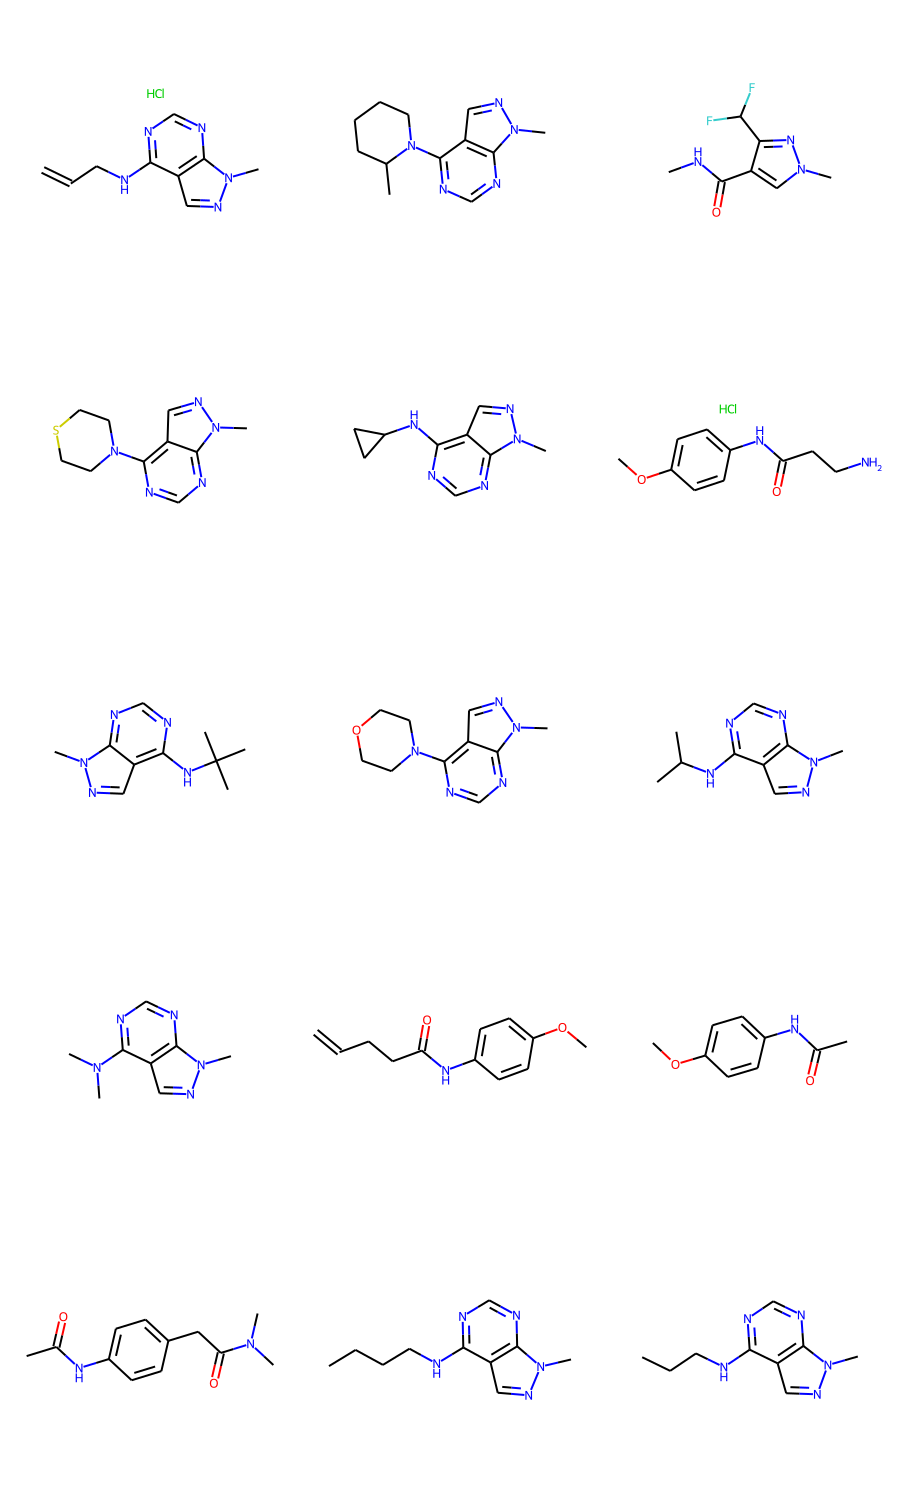

In [95]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(passed_mol_smiles, subImgSize=(300,300))